In [152]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

## Prepare Data For Siamese Network

Load Data and Labels

In [131]:
train_data_dir = r'C:\Users\jands\Market-1501-v15.09.15\bounding_box_train'

# the image size for all the images in The Market Dataset is 128x64
BATCH_SIZE = 32
IMAGE_SIZE = (128, 64)

dataset = []

In [132]:
file_paths = tf.data.Dataset.list_files(train_data_dir + '/*.jpg')

# Define the function to extract the label from the file name
# works for my specific directory path...
def extract_label(file_path):
    label = tf.strings.split(file_path, '_')
    label = tf.strings.split(label, '\\')
    return int(label[2][1])

def read_and_decode(file_path):
    label = extract_label(file_path)
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    return image, label

dataset = [read_and_decode(file) for file in file_paths]

Visualize Data

IMAGE SHAPE:  (128, 64, 3)


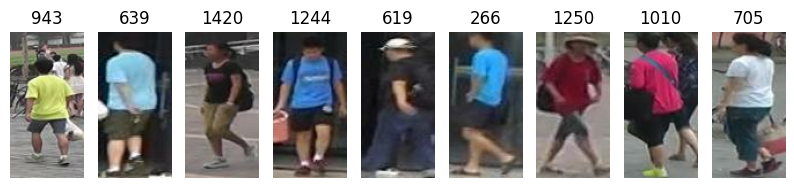

In [133]:
plt.figure(figsize=(10, 10))
subplot_pos = 1

for image, label in dataset[:9]:
  ax = plt.subplot(1, 9, subplot_pos)
  subplot_pos += 1
  plt.imshow(image)
  plt.title(label)
  plt.axis("off")

print("IMAGE SHAPE: ", image.shape)

In [ ]:
labels = [label for image, label in dataset]
unique_labels = np.unique(np.array(labels))

idxs = [np.where(labels == unique_label)[0] for unique_label in unique_labels]

for unique_label in unique_labels:
    idxs = np.where(labels == unique_label)[0]
    print(f"{unique_label}: {len(idxs)} {idxs}")

Make Pairs

In [162]:
def make_pairs(dataset):
    idxs_of_img_pairs = []
    
    labels = [label for image, label in dataset]
    unique_labels = np.unique(np.array(labels))

    idxs = [np.where(labels == unique_label)[0] for unique_label in unique_labels]
    
    # get all the combinations for people with the same label
    for i in range(len(idxs)):
        comb = combinations(idxs[i], 2)
        for combination in comb:
            idxs_of_img_pairs.append(combination)

    return idxs_of_img_pairs

idxs_of_img_pairs = make_pairs(dataset)

<Figure size 1000x1000 with 0 Axes>

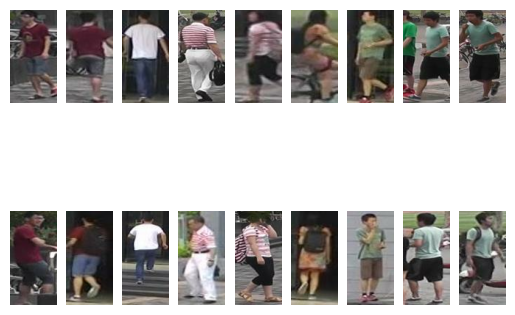

In [185]:
plt.figure(figsize=(10, 10))
subplot_pos = 1

images = [image for image, label in dataset]

fig, axes = plt.subplots(2, 9)
j = 0
for idx1, idx2 in idxs_of_img_pairs[:9000:1000]:
  axes[0, j].imshow(images[idx1])
  axes[1, j].imshow(images[idx2])
  axes[0, j].set_axis_off()
  axes[1, j].set_axis_off()
  j += 1